In [ ]:
import networkx as nx

filename = "facebook/0.edges"
G = nx.read_edgelist(filename)

# Or for Twitter, since the graph is directed.

filename = "twitter/12831.edges"
H = nx.read_edgelist(filename,create_using=nx.DiGraph)

FileNotFoundError: ignored

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import copy
import pandas as pd
import community
import colorlover as cl
import numpy as np
import pickle
from pathlib import Path

In [ ]:
facebook_combined =  pd.read_csv("facebook_combined.txt",sep=" ", index_col=False)

In [ ]:
facebook_combined

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6
...,...,...
88228,4026,4030
88229,4027,4031
88230,4027,4032
88231,4027,4038


In [ ]:
# Find the person who connects with the most people.
facebook_combined['0'].value_counts().max()
facebook_combined['0'].value_counts().idxmax()


107

In [ ]:
facebook_combined.loc[facebook_combined['0'] == 107]

,0,1
1641,107,171
1642,107,348
1643,107,353
1644,107,363
1645,107,366
...,...,...
2679,107,1907
2680,107,1908
2681,107,1909
2682,107,1910


In [ ]:
#Get network of all friends of 107, and append 107 to the list.
facebook_combined_most = facebook_combined.loc[facebook_combined['0'] == 107]
facebook_combined_most_friends = facebook_combined_most['1'].tolist()
facebook_combined_most_friends.append(107)
#len(facebook_combined_most_friends)

In [ ]:
# get all connections that connects to friends of 107
facebook_combined_friends = facebook_combined.loc[
    facebook_combined['0'].isin(facebook_combined_most_friends)]
facebook_combined_friends

,0,1
1641,107,171
1642,107,348
1643,107,353
1644,107,363
1645,107,366
...,...,...
38610,1899,1907
38611,1901,1910
38612,1902,1911
38613,1904,1906


In [ ]:
# friend_graph is a dictionary of lists in the form of {‘friend1’: [‘friend2, ‘friend3’]},
# where the keys are each of your friends and the value lists have all your mutual friends.
friend_graph ={}

for elements in facebook_combined_most_friends:
    friend_graph[elements] = []
    friends_single = facebook_combined_friends.loc[facebook_combined_friends['0']==elements]
    friends_single_col1 = friends_single['1'].tolist()
    
    for elements_2 in friends_single_col1:
        if elements_2 in facebook_combined_most_friends:
            friend_graph[elements].append(elements_2)

friend_graph

{171: [904, 1171, 1193, 1297, 1387, 1486, 1549, 1684],
 348: [353,
  363,
  366,
  376,
  389,
  414,
  420,
  428,
  475,
  483,
  484,
  517,
  526,
  538,
  563,
  566,
  1025],
 353: [363,
  366,
  376,
  420,
  428,
  475,
  483,
  484,
  517,
  526,
  538,
  566,
  580,
  601,
  606,
  637,
  641,
  651,
  930,
  936,
  976,
  1012,
  1075,
  1080,
  1114,
  1122,
  1155,
  1237,
  1313,
  1320,
  1349,
  1358,
  1374,
  1397,
  1425,
  1427,
  1475,
  1487,
  1512,
  1514,
  1529,
  1543,
  1574,
  1606,
  1616,
  1645,
  1673,
  1677,
  1679,
  1692,
  1694,
  1740,
  1744,
  1778,
  1790,
  1844,
  1855,
  1878,
  1881,
  1882],
 363: [366,
  376,
  414,
  475,
  483,
  484,
  517,
  526,
  538,
  566,
  580,
  606,
  637,
  651,
  936,
  976,
  1080,
  1113,
  1122,
  1155,
  1179,
  1237,
  1318,
  1320,
  1332,
  1349,
  1358,
  1374,
  1400,
  1425,
  1427,
  1506,
  1512,
  1514,
  1529,
  1536,
  1545,
  1574,
  1606,
  1616,
  1645,
  1671,
  1673,
  1677,
  1692,
  174

In [ ]:
# This is the target Facebook id. It can also be a number
CENTRAL_ID = 107

# Only keep friends with at least 2 common friends
central_friends = {}

for k, v in friend_graph.items():
    # This contains the list number of mutual friends.
    # Doing len(v) does not work because instead of returning mutual
    # friends, Facebook returns all the person's friends
    intersection_size = len(np.intersect1d(list(friend_graph.keys()), v))
    if intersection_size > 30:
        central_friends[k] = v

print('Firtered out {} items'.format(len(friend_graph.keys()) - len(central_friends.keys())))

Firtered out 748 items


In [ ]:
# Extract edges from graph

edges = []
nodes = [CENTRAL_ID]

for k, v in central_friends.items():
    for item in v:
        if item in central_friends.keys() or item == CENTRAL_ID:
            edges.append((k, item))

In [ ]:
G = nx.Graph()
G.add_nodes_from([CENTRAL_ID])
G.add_nodes_from(central_friends.keys())

G.add_edges_from(edges)
print('Added {} edges'.format(len(edges) ))

Added 9282 edges


In [ ]:
G

In [ ]:
pos = nx.spring_layout(G) # get the position using the spring layout algorithm

plt.rcParams['figure.figsize'] = [20, 20]
nx.draw_networkx(G, pos = pos, with_labels=False, 
                 node_size=15, width=0.3, node_color='blue', edge_color='grey')
limits=plt.axis('off') # turn of axis

NameError: ignored

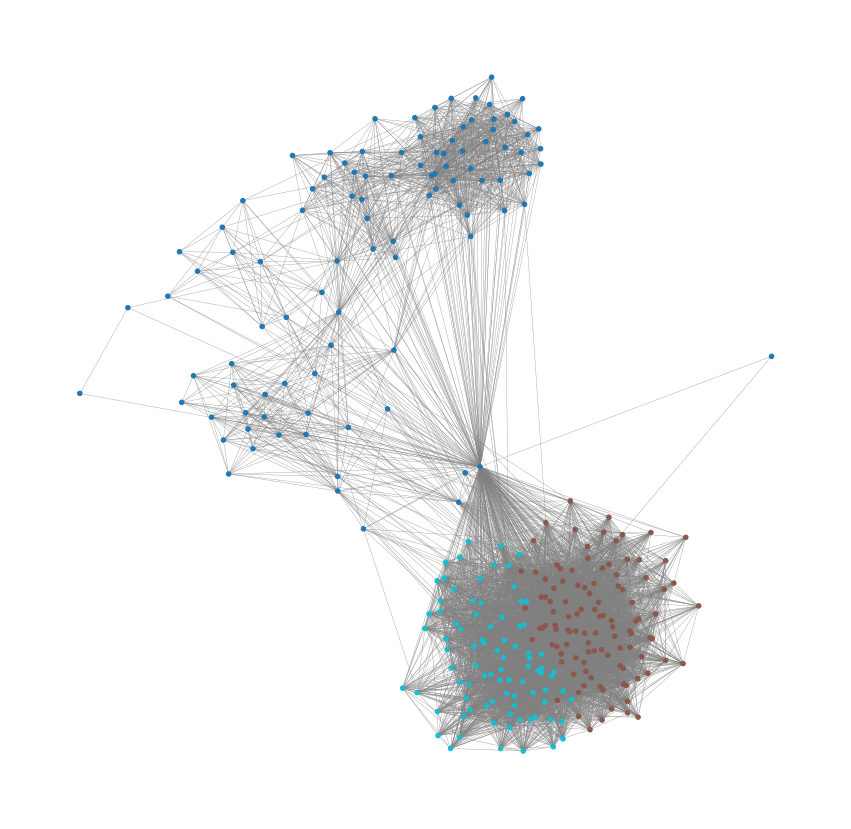

In [ ]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

plt.rcParams['figure.figsize'] = [15, 15]
nx.draw_networkx(G, pos = pos, 
                 cmap = plt.get_cmap('tab10'), node_color = values,
                 node_size=20, width=0.3, edge_color='grey', with_labels=False)
limits=plt.axis('off') # turn of axisb

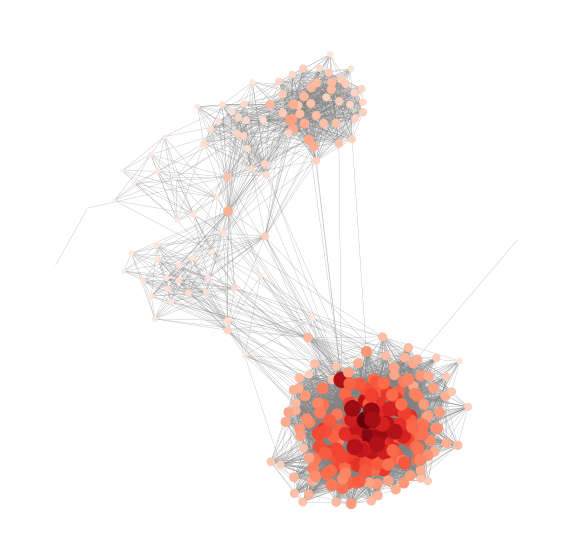

In [ ]:
# remove myself from the graph
G_f = copy.deepcopy(G)
G_f.remove_node(CENTRAL_ID)

# keep the position
pos_f = copy.deepcopy(pos)
pos_f.pop(CENTRAL_ID, None)

# Degree centrality
degree = nx.degree_centrality(G_f)
values = [degree.get(node)*500 for node in G_f.nodes()]

plt.rcParams['figure.figsize'] = [10, 10]
nx.draw_networkx(G_f, pos =pos_f,
                 cmap = plt.get_cmap('Reds'),
                 node_color = values, node_size=values,
                 width=0.2, edge_color='grey', with_labels=False)
limits=plt.axis('off') # turn of axisb

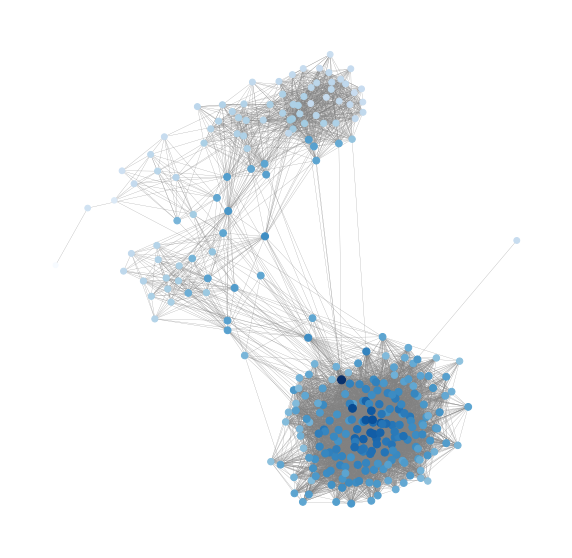

In [ ]:
#  Closeness centrality
close = nx.closeness_centrality(G_f)
values = [close.get(node)*100 for node in G_f.nodes()]

nx.draw_networkx(G_f, pos = pos_f,
                 cmap = plt.get_cmap('Blues'),
                 node_color = values, node_size=values,
                 width=0.2, edge_color='grey', with_labels=False)

limits=plt.axis('off') # turn of axisb

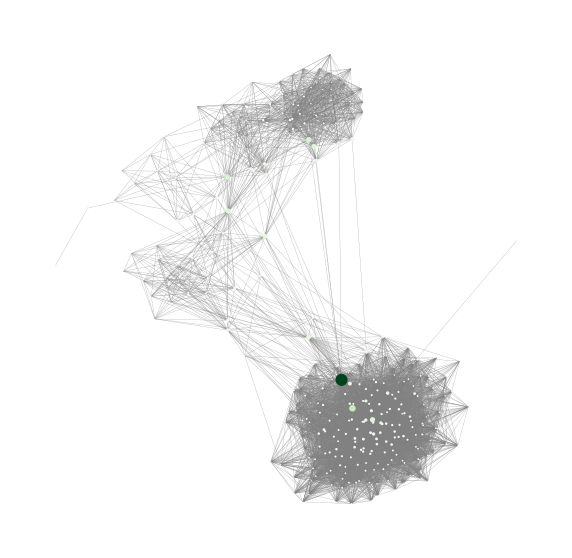

In [ ]:
#  Betweenness centrality
between = nx.betweenness_centrality(G_f)
values = [between.get(node)*500 for node in G_f.nodes()]

nx.draw_networkx(G_f, pos = pos_f,
                 cmap = plt.get_cmap('Greens'),
                 node_color = values, node_size=values,
                 width=0.2, edge_color='grey', with_labels=False)

limits=plt.axis('off') # turn of axisb

In [ ]:
#test
test = facebook_combined_friends.loc[facebook_combined_friends['0']==107]

test_col1 = test['1'].tolist()
test_dict = {107:[]}

for elements in test_col1:
    if elements in facebook_combined_most_friends:
        test_dict[107].append(elements)
test_dict

{107: [171,
  348,
  353,
  363,
  366,
  376,
  389,
  414,
  420,
  428,
  475,
  483,
  484,
  517,
  526,
  538,
  563,
  566,
  580,
  596,
  601,
  606,
  629,
  637,
  641,
  649,
  651,
  896,
  897,
  898,
  899,
  900,
  901,
  902,
  903,
  904,
  905,
  906,
  907,
  908,
  909,
  910,
  911,
  912,
  913,
  914,
  915,
  916,
  917,
  918,
  919,
  920,
  921,
  922,
  923,
  924,
  925,
  926,
  927,
  928,
  929,
  930,
  931,
  932,
  933,
  934,
  935,
  936,
  937,
  938,
  939,
  940,
  941,
  942,
  943,
  944,
  945,
  946,
  947,
  948,
  949,
  950,
  951,
  952,
  953,
  954,
  955,
  956,
  957,
  958,
  959,
  960,
  961,
  962,
  963,
  964,
  965,
  966,
  967,
  968,
  969,
  970,
  971,
  972,
  973,
  974,
  975,
  976,
  977,
  978,
  979,
  980,
  981,
  982,
  983,
  984,
  985,
  986,
  987,
  988,
  989,
  990,
  991,
  992,
  993,
  994,
  995,
  996,
  997,
  998,
  999,
  1000,
  1001,
  1002,
  1003,
  1004,
  1005,
  1006,
  1007,
  1008,
  1009

In [ ]:
G= nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(),nodetype=int)
G

In [ ]:
G_f= copy.deepcopy(G)
G_f.remove_node(CENTRAL_ID)

NameError: name 'CENTRAL_ID' is not defined